In [2]:
import json
import os
import matplotlib.pyplot as plt
from typing import List

In [3]:
def load_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

In [4]:
# Loading training data
train_challenges = load_json(os.path.join('..', 'data','arc-agi-2025','raw', 'arc-agi_training_challenges.json'))
train_solutions = load_json(os.path.join('..', 'data', 'arc-agi-2025','raw','arc-agi_training_solutions.json'))
# Loading evaluation data
eval_challenges = load_json(os.path.join('..', 'data','arc-agi-2025','raw', 'arc-agi_evaluation_challenges.json'))
eval_solutions = load_json(os.path.join('..', 'data', 'arc-agi-2025','raw','arc-agi_evaluation_solutions.json'))

In [5]:
print("Number of training challenges: ", len(train_challenges))
print("Number of training solutions: ", len(train_solutions))

Number of training challenges:  1000
Number of training solutions:  1000


In [6]:
train_challenges['00576224']

{'train': [{'input': [[7, 9], [4, 3]],
   'output': [[7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3],
    [9, 7, 9, 7, 9, 7],
    [3, 4, 3, 4, 3, 4],
    [7, 9, 7, 9, 7, 9],
    [4, 3, 4, 3, 4, 3]]},
  {'input': [[8, 6], [6, 4]],
   'output': [[8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4],
    [6, 8, 6, 8, 6, 8],
    [4, 6, 4, 6, 4, 6],
    [8, 6, 8, 6, 8, 6],
    [6, 4, 6, 4, 6, 4]]}],
 'test': [{'input': [[3, 2], [7, 8]]}]}

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from typing import List, Union
import numpy as np

cmap = ListedColormap([
        '#000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
        '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'
    ])
def plot_task(
    task: dict,
    title: str = None
) -> None:
    """
    displays a task with training examples and test and train inputs
    """
  
    norm = Normalize(vmin=0, vmax=9)
    args = {'cmap': cmap, 'norm': norm}
    
    # Combine train and test examples
    train_examples = task['train']
    test_examples = task['test']
    
    # Calculate total width needed
    train_width = len(train_examples)
    test_width = len(test_examples)
    total_width = train_width + test_width
    
    height = 2  # Always 2 rows (input and output)
    figure_size = (total_width * 3, height * 3)
    figure, axes = plt.subplots(height, total_width, figsize=figure_size)
    
    # Handle single example case
    if total_width == 1:
        axes = axes.reshape(2, 1)
    
    column = 0
    
    # Plot training examples
    for example in train_examples:
        # Get grid dimensions
        input_height, input_width = len(example['input']), len(example['input'][0])
        output_height, output_width = len(example['output']), len(example['output'][0])
        
        # Plot the grids
        axes[0, column].imshow(example['input'], **args)
        axes[1, column].imshow(example['output'], **args)
        
        # Add dimension labels
        axes[0, column].set_title(f'Train Input: {input_height}×{input_width}', fontsize=10)
        axes[1, column].set_title(f'Train Output: {output_height}×{output_width}', fontsize=10)
        
        axes[0, column].axis('off')
        axes[1, column].axis('off')
        column += 1
    
    # Plot test examples
    for example in test_examples:
        # Get grid dimensions
        input_height, input_width = len(example['input']), len(example['input'][0])
                
        # Plot the grids
        axes[0, column].imshow(example['input'], **args)
        
      
        
        # Add dimension labels
        axes[0, column].set_title(f'Test Input: {input_height}×{input_width}', fontsize=10)
        
        axes[0, column].axis('off')
        axes[1, column].axis('off')
        column += 1
    
    if title is not None:
        figure.suptitle(title, fontsize=20)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


def plot_figure(task: List[List[int]], title: str = None) -> None:
    """
    displays a single 2D list (grid)
    """
    height = len(task)
    width = len(task[0]) if height > 0 else 0
    
    # Create figure with appropriate size
    fig_size = (max(width * 0.5, 4), max(height * 0.5, 3))
    figure, axes = plt.subplots(1, 1, figsize=fig_size)
    
    # Plot the grid
    norm = Normalize(vmin=0, vmax=9)
    args = {'cmap': cmap, 'norm': norm}
    axes.imshow(task, **args)
    
    # Add title and labels
    if title is not None:
        axes.set_title(title, fontsize=16)
    axes.set_title(f'Grid: {height}×{width}', fontsize=12)
    
    # Remove axis ticks
    axes.set_xticks([])
    axes.set_yticks([])
    
    plt.tight_layout()
    plt.show()



Example Challenges :

Challenge Key: 00576224
{'train': [{'input': [[7, 9], [4, 3]], 'output': [[7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3], [9, 7, 9, 7, 9, 7], [3, 4, 3, 4, 3, 4], [7, 9, 7, 9, 7, 9], [4, 3, 4, 3, 4, 3]]}, {'input': [[8, 6], [6, 4]], 'output': [[8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4], [6, 8, 6, 8, 6, 8], [4, 6, 4, 6, 4, 6], [8, 6, 8, 6, 8, 6], [6, 4, 6, 4, 6, 4]]}], 'test': [{'input': [[3, 2], [7, 8]]}]}


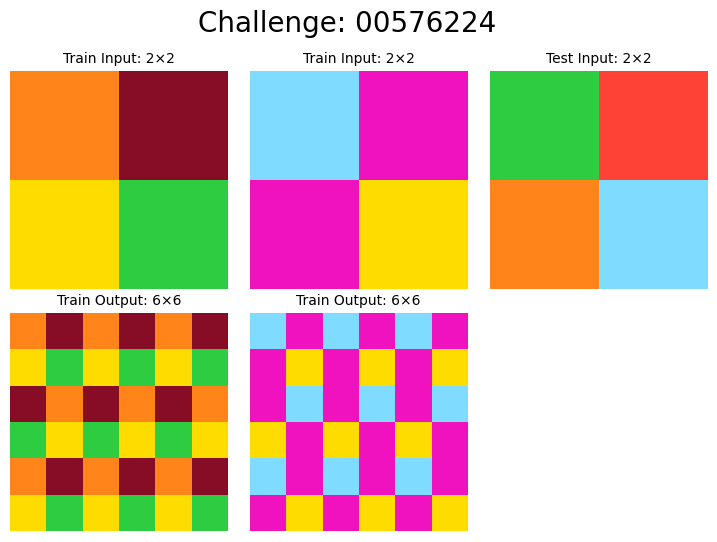

Challenge Key: 007bbfb7
{'train': [{'input': [[6, 6, 0], [6, 0, 0], [0, 6, 6]], 'output': [[6, 6, 0, 6, 6, 0, 0, 0, 0], [6, 0, 0, 6, 0, 0, 0, 0, 0], [0, 6, 6, 0, 6, 6, 0, 0, 0], [6, 6, 0, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 6, 0, 6, 6, 0], [0, 0, 0, 6, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 6]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0]]}, {'input': [[0, 0, 0], [0, 0, 2], [2, 0, 2]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 0, 0, 0, 2], [2, 0, 2, 0, 0, 0, 2, 0, 2]]}, {'input'

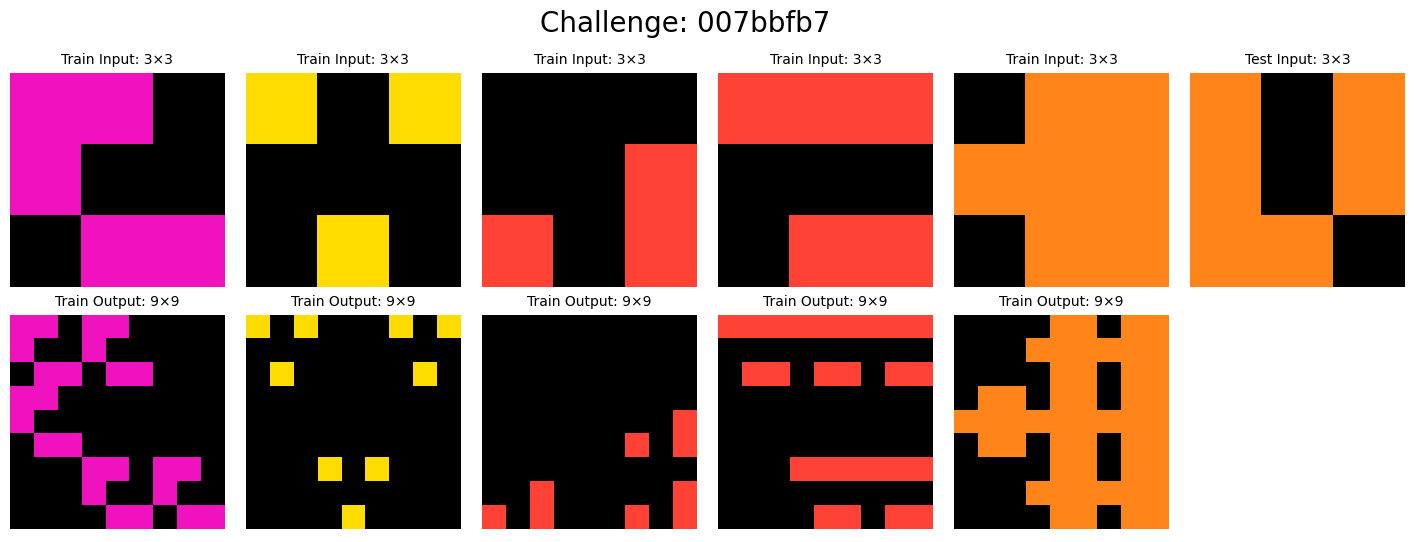

Challenge Key: 009d5c81
{'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 8, 0], [0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 8, 8, 8, 0], [0, 0, 0, 0, 8, 8, 0, 0, 8, 8, 8, 0, 8, 8], [0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 8, 8, 0, 0, 0, 8, 8, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'output': [[0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0], [0, 0, 0, 0, 0, 7, 7, 7, 7, 0, 7, 7, 7, 0], [0, 0, 0, 0, 7, 7, 0, 0, 7, 7, 7, 0, 7, 7], [0, 0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 7, 0], [0, 0, 0, 0, 0, 0, 7, 7, 0, 0, 0, 7, 7, 0], [0, 0, 0, 0, 0, 0,

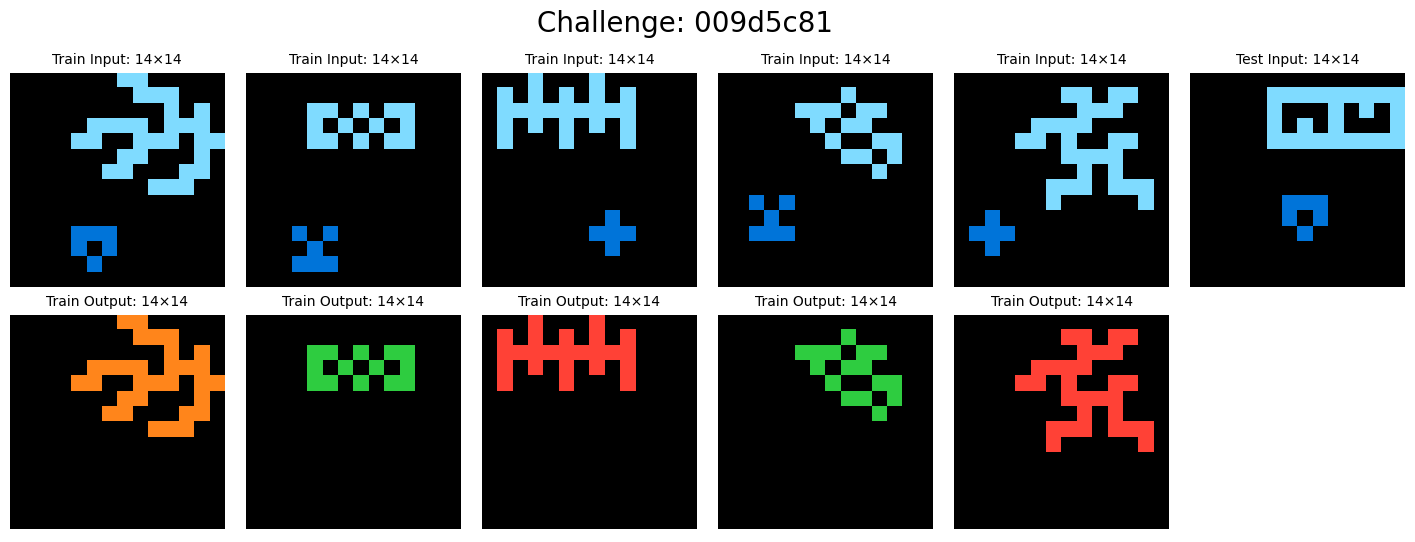

Challenge Key: 00d62c1b
{'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 0, 0, 0, 3, 3, 0], [0, 0, 0, 3, 3, 0, 0, 3, 0, 3], [0, 0, 0, 3, 0, 3, 0, 0, 3, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]], 'output': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 3, 3, 3, 0, 0, 0, 0], [0, 0, 3, 4, 4, 3, 0, 0, 0, 0], [0, 0, 3, 4, 4, 3, 0, 3, 0, 0], [0, 0, 3, 3, 3, 3, 3, 3, 3, 0], [0, 0, 0, 3, 0, 0, 0, 0, 3, 0], [0, 0, 0, 3, 0, 0, 0, 3, 3, 0], [0, 0, 0, 3, 3, 0, 0, 3, 4, 3], [0, 0, 0, 3, 4, 3, 0, 0, 3, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0]]}, {'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 3, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0, 3, 0, 0, 0], [0, 0, 0, 0, 0, 3, 0, 3, 0, 0], [0, 0, 0, 3, 0, 3, 3, 0, 0, 0], [0, 0, 3, 3, 3, 0, 0, 0, 0, 0], [0, 0, 0, 3, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [

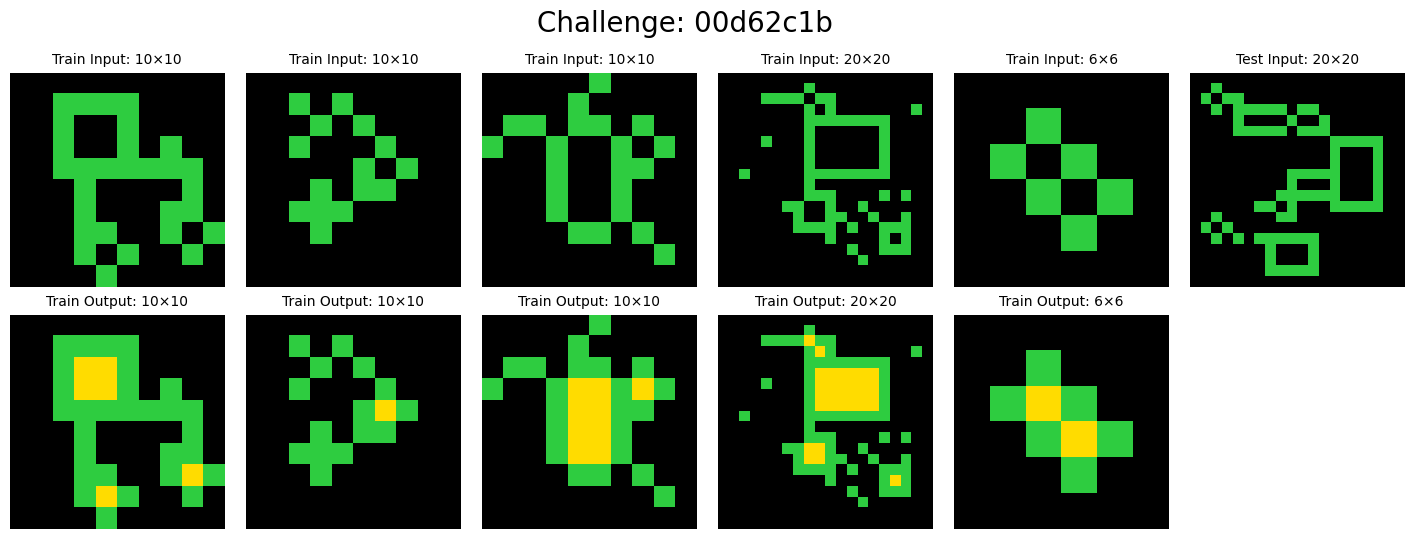

Challenge Key: 00dbd492
{'train': [{'input': [[0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], [0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'output': [[0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2], [0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2], [0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2], [0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 2, 3, 3, 3, 2], [0

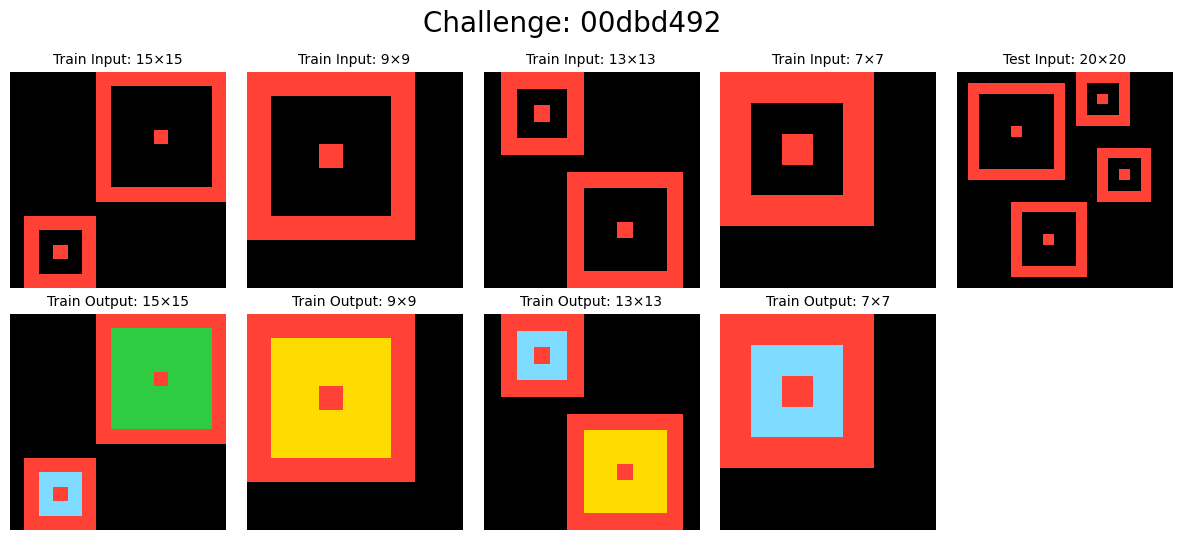

In [8]:
print("Example Challenges :\n")
i = 0
for challenge_key, challenge_data in train_challenges.items():
    print(f"Challenge Key: {challenge_key}")
    print(challenge_data)
    plot_task(challenge_data, title=f"Challenge: {challenge_key}")
    i += 1
    if i == 5:
        break



Evaluation Challenges :

Challenge Key: 0934a4d8
{'train': [{'input': [[3, 5, 3, 3, 6, 6, 5, 4, 1, 4, 9, 9, 4, 3, 9, 9, 9, 9, 3, 4, 9, 9, 4, 1, 4, 5, 6, 6, 3, 3], [5, 3, 3, 3, 6, 6, 4, 5, 4, 1, 9, 9, 3, 4, 9, 1, 1, 9, 4, 3, 9, 9, 1, 4, 5, 4, 6, 6, 3, 3], [1, 1, 3, 5, 5, 4, 6, 6, 9, 1, 1, 4, 9, 9, 4, 5, 5, 4, 9, 9, 4, 1, 1, 9, 6, 6, 4, 5, 5, 3], [1, 1, 5, 3, 4, 5, 6, 6, 1, 9, 4, 1, 9, 1, 4, 4, 4, 4, 1, 9, 1, 4, 9, 1, 6, 6, 5, 4, 3, 5], [6, 9, 9, 9, 3, 5, 3, 3, 4, 3, 9, 9, 9, 2, 6, 9, 9, 6, 2, 9, 9, 9, 3, 4, 3, 3, 5, 3, 9, 9], [9, 6, 9, 9, 5, 3, 3, 3, 3, 4, 9, 1, 9, 9, 9, 6, 6, 9, 9, 9, 1, 9, 4, 3, 3, 3, 3, 5, 9, 9], [9, 9, 6, 9, 1, 1, 3, 5, 9, 9, 4, 4, 6, 9, 9, 2, 2, 9, 9, 6, 4, 4, 9, 9, 5, 3, 1, 1, 9, 6], [9, 9, 9, 6, 1, 1, 5, 3, 9, 1, 5, 4, 9, 6, 9, 9, 9, 9, 6, 9, 4, 5, 1, 9, 3, 5, 1, 1, 6, 9], [1, 4, 9, 1, 4, 3, 9, 9, 5, 5, 7, 2, 4, 3, 2, 4, 4, 2, 3, 4, 2, 7, 5, 5, 9, 9, 3, 4, 1, 9], [4, 1, 1, 9, 3, 4, 9, 1, 4, 5, 2, 7, 3, 4, 4, 2, 2, 4, 4, 3, 7, 2, 5, 4, 1, 9, 4, 3, 9, 1], [9, 9, 1,

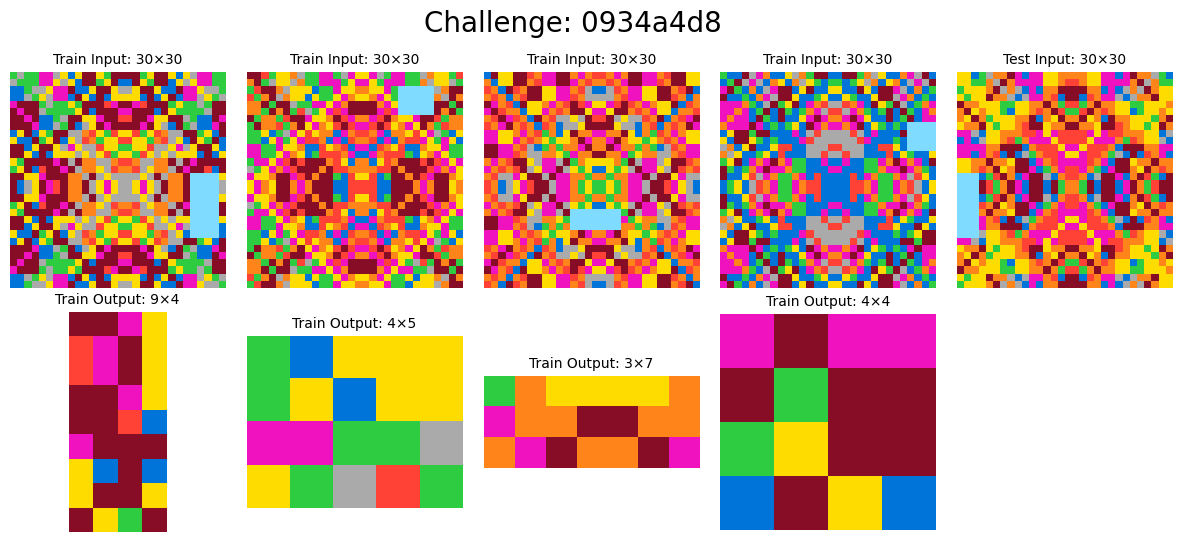

Challenge Key: 135a2760
{'train': [{'input': [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 2, 1, 3, 1, 3, 1, 3, 3, 3, 1, 2, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], 'output': [[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 3], [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]]}, {'input': [[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4], [4, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 2, 4], [4, 2, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 2, 4], [4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4], [4, 2, 1, 4, 1, 4, 1, 4, 1, 1, 1, 4, 1, 4, 

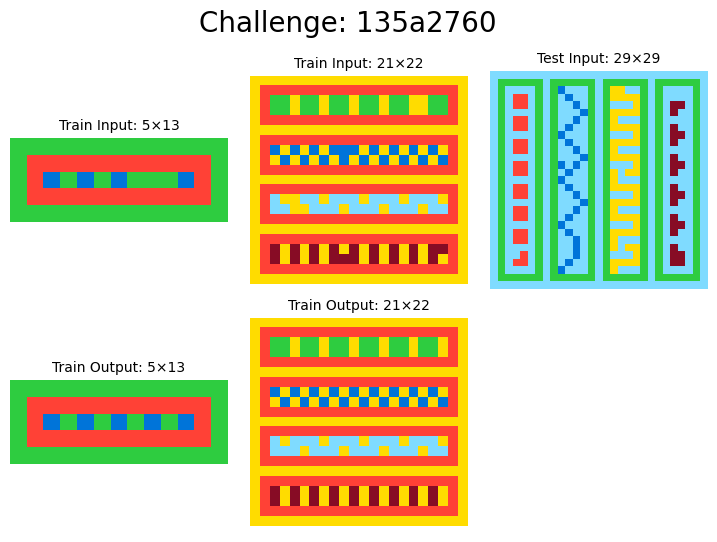

Challenge Key: 136b0064
{'train': [{'input': [[2, 0, 2, 0, 6, 0, 6, 4, 0, 5, 0, 0, 0, 0, 0], [2, 0, 2, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 3, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 6, 0, 6, 4, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 6, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0], [6, 0, 6, 0, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0], [0, 6, 0, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0], [0, 6, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0]], 'output': [[0, 5, 0, 0, 0, 0, 0], [2, 2, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 0, 0], [0, 3, 3, 3, 3, 0, 0], [0, 6, 0, 0, 0, 0, 0], [0, 6, 

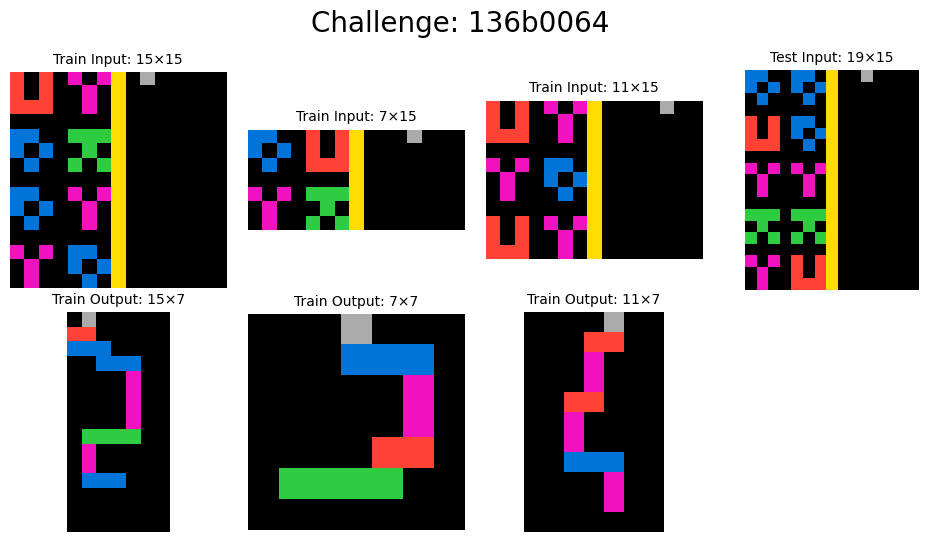

Challenge Key: 13e47133
{'train': [{'input': [[7, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8], [1, 8, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1,

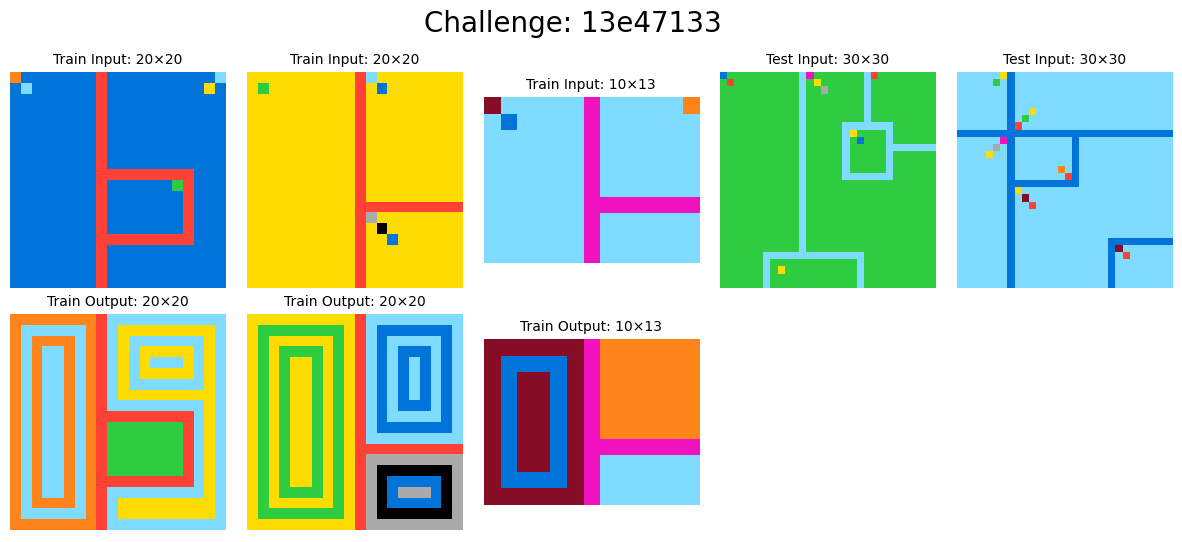

Challenge Key: 142ca369
{'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0,

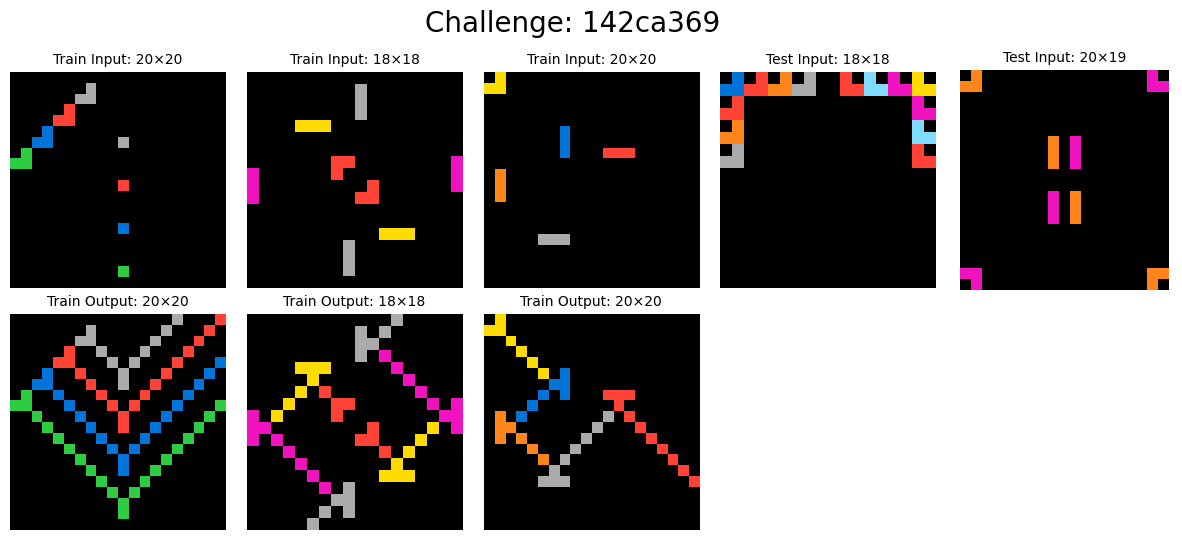

In [9]:
print("Evaluation Challenges :\n")
i = 0
for challenge_key, challenge_data in eval_challenges.items():
    print(f"Challenge Key: {challenge_key}")
    print(challenge_data)
    plot_task(challenge_data, title=f"Challenge: {challenge_key}")
    i += 1
    if i == 5:
        break


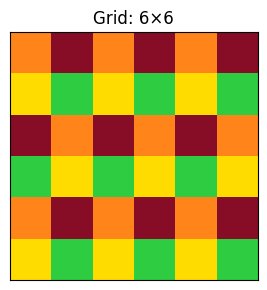

In [94]:
plot_figure(train_challenges['00576224']["train"][0]['output'])

In [ ]:
print("Example Solution :\n")
train

Example Solution :



[[[3, 2, 3, 2, 3, 2],
  [7, 8, 7, 8, 7, 8],
  [2, 3, 2, 3, 2, 3],
  [8, 7, 8, 7, 8, 7],
  [3, 2, 3, 2, 3, 2],
  [7, 8, 7, 8, 7, 8]]]

In [ ]:
# Maximum no. of training examples contained in a challenge
# Maximum no. of tests contained in a challenge
# Maximum dimension of input grids in the training set
# Maximum dimension of output grids in the training set

max_train_examples = 0
max_test_examples = 0
max_input_dim = 0
max_output_dim = 0

no_of_train_examples = []
count_of_test_examples = []
for challenge in train_challenges.values():
    if len(challenge['train']) > max_train_examples:
        max_train_examples = len(challenge['train'])
    if len(challenge['test']) > max_test_examples:
        max_test_examples = len(challenge['test'])
    for example in challenge['train']:
        input_grid = example['input']
        output_grid = example['output']
        if len(input_grid) > max_input_dim:
            max_input_dim = len(input_grid)
        if len(input_grid[0]) > max_input_dim:
            max_input_dim = len(input_grid[0])
        if len(output_grid) > max_output_dim:
            max_output_dim = len(output_grid)
        if len(output_grid[0]) > max_output_dim:
            max_output_dim = len(output_grid[0])
    no_of_train_examples.append(len(challenge['train']))
    count_of_test_examples.append(len(challenge['test']))
print("Maximum no. of training examples contained in a challenge: ", max_train_examples)
print("Maximum no. of tests contained in a challenge: ", max_test_examples)
print("Maximum dimension of input grids in the training set: ", max_input_dim)
print("Maximum dimension of output grids in the training set: ", max_output_dim)

Maximum no. of training examples contained in a challenge:  10
Maximum no. of tests contained in a challenge:  4
Maximum dimension of input grids in the training set:  30
Maximum dimension of output grids in the training set:  30


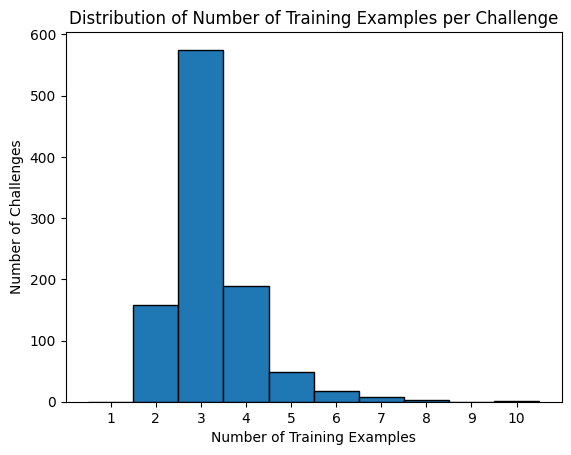

In [ ]:
# Plot the distribution of number of training examples per challenge
plt.hist(no_of_train_examples, bins=range(1, max_train_examples + 2), align='left', edgecolor='black')
plt.xlabel('Number of Training Examples')
plt.ylabel('Number of Challenges')
plt.title('Distribution of Number of Training Examples per Challenge')
plt.xticks(range(1, max_train_examples + 1))
plt.show()

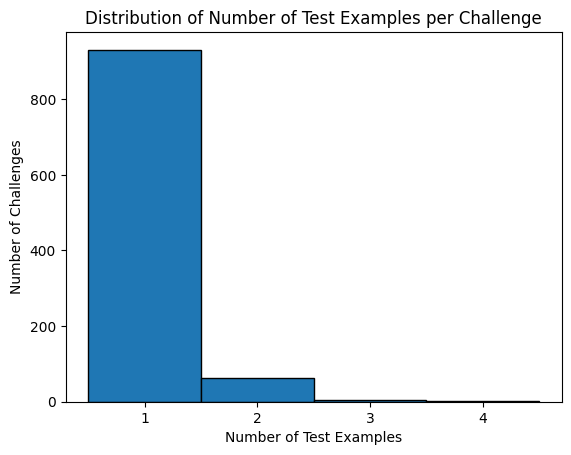

In [ ]:
# Plot the distribution of number of test examples per challenge
plt.hist(count_of_test_examples, bins=range(1, max_test_examples + 2), align='left', edgecolor='black')
plt.xlabel('Number of Test Examples')
plt.ylabel('Number of Challenges')
plt.title('Distribution of Number of Test Examples per Challenge')
plt.xticks(range(1, max_test_examples + 1))
plt.show()

In [ ]:
# Maximum no. of evaluation examples contained in a challenge
# Maximum no. of tests contained in a challenge in the evaluation set
# Maximum dimension of input grids in the training set
# Maximum dimension of output grids in the training set

max_eval_examples = 0
max_test_examples = 0
max_input_dim = 0
max_output_dim = 0

no_of_eval_examples = []
count_of_test_examples = []
for challenge in eval_challenges.values():
    if len(challenge['train']) > max_eval_examples:
        max_eval_examples = len(challenge['train'])
    if len(challenge['test']) > max_test_examples:
        max_test_examples = len(challenge['test'])
    for example in challenge['train']:
        input_grid = example['input']
        output_grid = example['output']
        if len(input_grid) > max_input_dim:
            max_input_dim = len(input_grid)
        if len(input_grid[0]) > max_input_dim:
            max_input_dim = len(input_grid[0])
        if len(output_grid) > max_output_dim:
            max_output_dim = len(output_grid)
        if len(output_grid[0]) > max_output_dim:
            max_output_dim = len(output_grid[0])
    no_of_eval_examples.append(len(challenge['train']))
    count_of_test_examples.append(len(challenge['test']))
print("Maximum no. of training examples contained in a challenge: ", max_eval_examples)
print("Maximum no. of tests contained in a challenge: ", max_test_examples)
print("Maximum dimension of input grids in the training set: ", max_input_dim)
print("Maximum dimension of output grids in the training set: ", max_output_dim)

Maximum no. of training examples contained in a challenge:  6
Maximum no. of tests contained in a challenge:  3
Maximum dimension of input grids in the training set:  30
Maximum dimension of output grids in the training set:  30


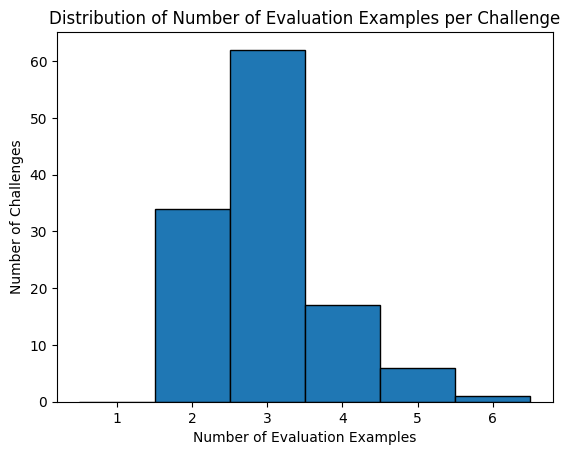

In [ ]:
# Plotting histogram of no. of evaluation examples in challenges
plt.hist(no_of_eval_examples, bins=range(1, max_eval_examples + 2), align='left', edgecolor='black')
plt.xlabel('Number of Evaluation Examples')
plt.ylabel('Number of Challenges')
plt.title('Distribution of Number of Evaluation Examples per Challenge')
plt.xticks(range(1, max_eval_examples + 1))
plt.show()

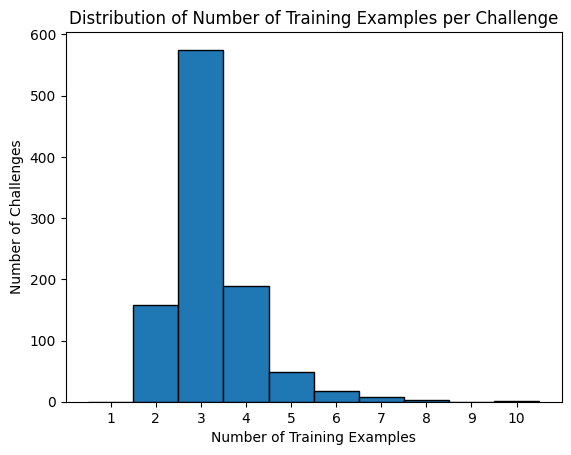

In [ ]:
# Plotting histogram of no. of training examples in challenges
plt.hist(no_of_train_examples, bins=range(1, max_train_examples + 2), align='left', edgecolor='black')
plt.xlabel('Number of Training Examples')
plt.ylabel('Number of Challenges')
plt.title('Distribution of Number of Training Examples per Challenge')
plt.xticks(range(1, max_train_examples + 1))
plt.show()

In [ ]:
# Link for external data - https://www.kaggle.com/competitions/arc-prize-2024/writeups/guillermo-barbadillo-2nd-place-solution-for-the-ar